<a href="https://colab.research.google.com/github/sbooeshaghi/COVID19-County/blob/master/LA_County_Triggers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install pandas
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mplcol
import matplotlib.font_manager
import matplotlib as mpl
import pandas as pd
import json
import datetime as dt
import time



fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [ ]:
!printf "[info] Processing notebook"

[info] Processing notebook

In [ ]:
!mkdir -p plots

In [ ]:
!wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

--2021-02-23 20:10:53--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43119856 (41M) [text/plain]
Saving to: ‘us-counties.csv’

us-counties.csv     100%[===================>]  41.12M   118MB/s    in 0.3s    

2021-02-23 20:10:53 (118 MB/s) - ‘us-counties.csv’ saved [43119856/43119856]



In [ ]:
pop = 10_039_107
norm = 100_000
time_delta = 14 # days ie 2 weeks
lag = 2 # days
df = pd.read_csv("us-counties.csv").query("county=='Palm Beach'")
df = df.set_index(pd.to_datetime(df.date.values)).sort_index()

In [ ]:
#data = (df["cases"].rolling(window="14d").sum()/pop*norm)[time_delta:]
data = np.array([df["cases"].values[i+14]-df["cases"].values[i] for i in range(0, df.shape[0]-14)])
dates = pd.to_datetime([df["date"].values[i+14] for i in range(0, df.shape[0]-14)])

per_diem = np.array([df["cases"].values[i+14]-df["cases"].values[i+13] for i in range(0, df.shape[0]-14)])

In [ ]:
update_time = dt.datetime.utcnow().strftime('%A %B %d %Y %H:%M:%S')

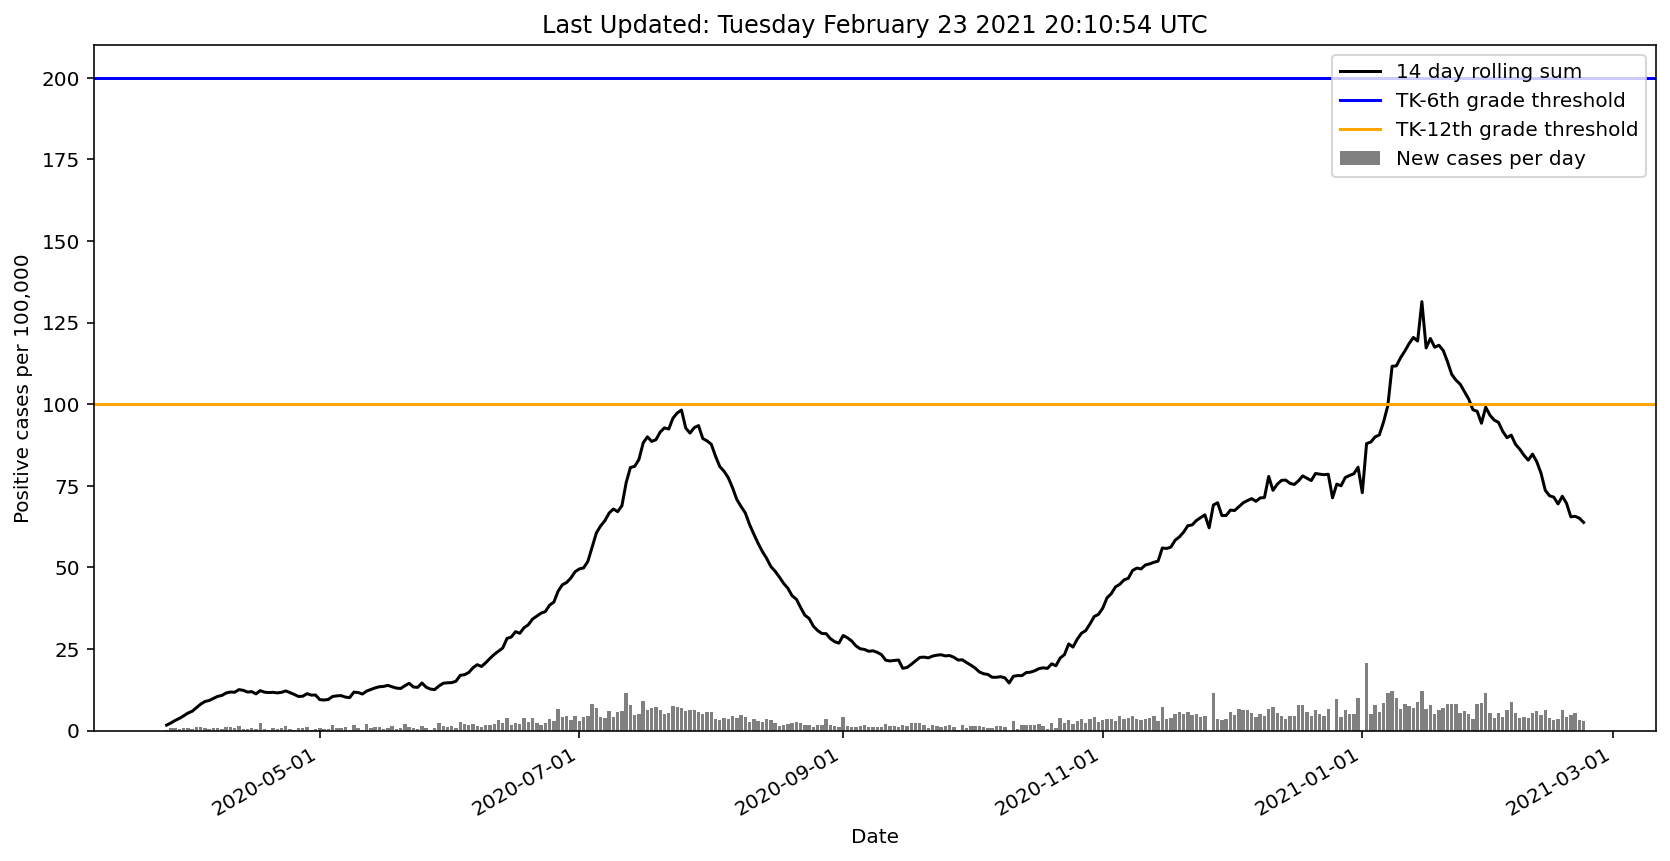

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

x = dates.date
y = data*norm/pop

yy = per_diem*norm/pop
# xx = df.index.max() - dt.timedelta(days=lag)

ax.plot(x,  y, color="k", label="14 day rolling sum")
ax.bar(x, yy, color="grey", label="New cases per day")
ax.axhline(y=200, color="blue", label="TK-6th grade threshold")
ax.axhline(y=100, color="orange", label="TK-12th grade threshold")
# ax.axvline(x=xx, label="Date after which data may be incomplete", color="grey", linestyle="--")

kwd = {
    "xlabel": "Date",
    "ylabel" : "Positive cases per 100,000",
    "title": f"Last Updated: {update_time} UTC"
}

myFmt = mpl.dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
# 
# ## Rotate date labels automatically
fig.autofmt_xdate()
# 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set(**kwd)
ax.legend()

plt.savefig("./plots/graph.png",bbox_inches='tight', dpi=300)

fig.show()

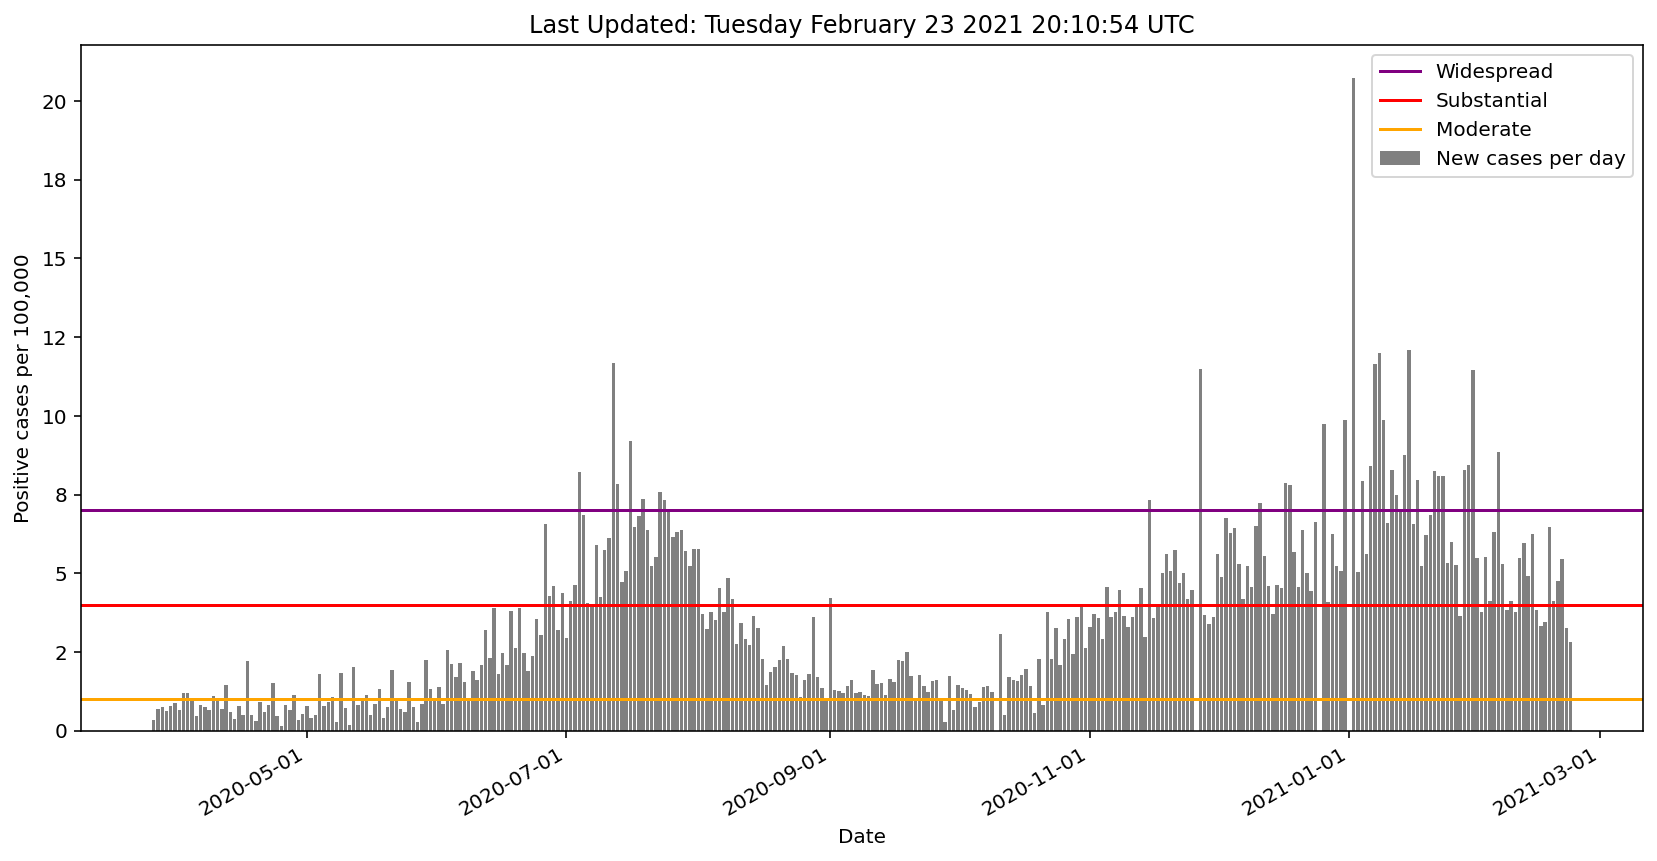

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

x = dates.date

y = per_diem*norm/pop


ax.bar(x, y, color="grey", label="New cases per day")

ax.axhline(y=7, color="purple", label="Widespread")
ax.axhline(y=4, color="red", label="Substantial")
ax.axhline(y=1, color="orange", label="Moderate")

kwd = {
    "xlabel": "Date",
    "ylabel" : "Positive cases per 100,000",
    "title": f"Last Updated: {update_time} UTC"
}

myFmt = mpl.dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
# 
# ## Rotate date labels automatically
fig.autofmt_xdate()
# 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set(**kwd)
ax.legend()

plt.savefig("./plots/classification.png",bbox_inches='tight', dpi=300)

fig.show()

In [ ]:
!printf "[info] Finished processing notebook"

[info] Finished processing notebook

In [ ]:
!pip3 freeze > requirements.txt